In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

In [2]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/grids/"

In [3]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [4]:
def calcdz(dat):
    H=7000.
    z=-H*np.log(dat.ilev/1000.)
    dz = -1.*(np.array(z.isel(ilev=slice(1,dat.ilev.size))) - np.array(z.isel(ilev=slice(0,dat.ilev.size-1))))
    return dz

In [5]:
waccm = xr.open_dataset(basepath+'WACCM.nc')
cam = xr.open_dataset(basepath+'CAM.nc')
mt = xr.open_dataset(basepath+'MT.nc')
lt = xr.open_dataset(basepath+'LT.nc')
l83 = xr.open_dataset(basepath+'L83.nc')

In [6]:
def setupplot(x1, x2, y1, y2, titlestr, xlim=None):
    H=7000.
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_ylim(-np.log(1000),-np.log(1e-6))
    if (xlim):
        ax.set_xlim(0,xlim)
        ax.set_xticks( (np.arange(0,xlim/500+1,1)*500).astype(int).tolist())
        ax.set_xticklabels( (np.arange(0,xlim/500+1,1)*500).astype(int).tolist(), fontsize=13)
    else:
        ax.set_xlim(0,5800)
        ax.set_xticks(np.arange(0,5500/1000+1,1)*1000)
        ax.set_xticklabels( (np.arange(0,5500/1000+1,1)*1000).astype(int).tolist(), fontsize=13)
        
    ax.set_yticks([-np.log(1000),-np.log(100),-np.log(10),-np.log(1),-np.log(0.1),
                   -np.log(0.01),-np.log(0.001),-np.log(0.0001),-np.log(0.00001),-np.log(0.000001)])
    ax.set_yticklabels(['1000','100','10','1','0.1','1e-2','1e-3','1e-4','1e-5','1e-6'], fontsize=13)
    ax.set_ylabel('Pressure (hPa)', fontsize=14)
    
    ax2 = ax.twinx()
    ax2.set_ylim(-np.log(1000),-np.log(1e-6))
    
    zticks=[0,20,40,60,80,100,120,140]
    ztickvals = [1000.*np.exp(-zticks[i]*1000./H) for i in np.arange(0,len(zticks),1)]
    ax2.set_yticks(-np.log(ztickvals))
    ax2.set_yticklabels(['0','20','40','60','80','100','120','140'], fontsize=13)
    ax2.set_ylabel('Height (km)', fontsize=14)
    
    ax.set_title(titlestr,fontsize=16)
    ax.set_xlabel('dz (m)', fontsize=14)
    
    return ax

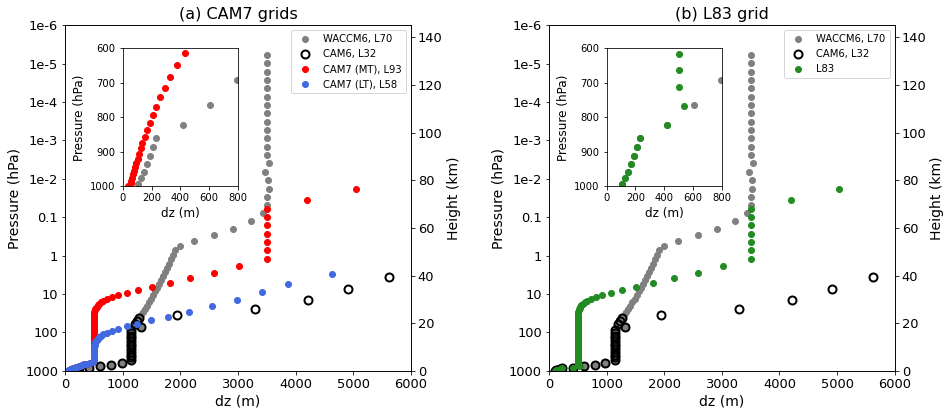

In [7]:
fig = plt.figure(figsize=(16,16))

ax = setupplot(0.02,0.32,0.7,1,'(a) CAM7 grids')
dz_waccm = calcdz(waccm)
ax.plot(dz_waccm,-1.*np.log(waccm.lev),"o", color='gray', label='WACCM6, L'+str(len(waccm.lev)))
dz_cam = calcdz(cam)
ax.plot(dz_cam, -1.*np.log(cam.lev),"o", markerfacecolor='none',markeredgecolor='black', markersize=8, markeredgewidth=2, 
        label='CAM6, L'+str(len(cam.lev)))

dz_mt = calcdz(mt)
dz_lt = calcdz(lt)

ax.plot(dz_mt, -1.*np.log(mt.lev),"o", color='red', label='CAM7 (MT), L'+str(len(mt.lev)))

ax.plot(dz_lt, -1.*np.log(lt.lev),"o", color='royalblue', label='CAM7 (LT), L'+str(len(lt.lev)))

ax.legend()


ax = fig.add_axes([0.07,0.86,0.1,0.12])
ax.set_ylim(-1000,-600)
ax.set_xlim(0,800)
ax.set_xticks([0,200,400,600,800])
ax.set_xticklabels(['0','200','400','600','800'], fontsize=10)
ax.set_xlabel('dz (m)', fontsize=12)
ax.set_yticks([-1000,-900,-800,-700,-600])
ax.set_yticklabels(['1000','900','800','700','600'], fontsize=10)
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.plot(dz_waccm,-1.*waccm.lev,"o", color='gray', label='WACCM6')
ax.plot(dz_mt, -1.*mt.lev, "o", color='red', label='CAM7 (MT)')


ax = setupplot(0.44,0.74,0.7,1,'(b) L83 grid')
dz_waccm = calcdz(waccm)
ax.plot(dz_waccm,-1.*np.log(waccm.lev),"o", color='gray', label='WACCM6, L'+str(len(waccm.lev)))
dz_cam = calcdz(cam)
ax.plot(dz_cam, -1.*np.log(cam.lev),"o", markerfacecolor='none',markeredgecolor='black', markersize=8, markeredgewidth=2, 
        label='CAM6, L'+str(len(cam.lev)))

dz_l83 = calcdz(l83)

ax.plot(dz_l83, -1.*np.log(l83.lev), "o", color='forestgreen', label='L83')

ax.legend()


ax = fig.add_axes([0.49,0.86,0.1,0.12])
ax.set_ylim(-1000,-600)
ax.set_xlim(0,800)
ax.set_xticks([0,200,400,600,800])
ax.set_xticklabels(['0','200','400','600','800'], fontsize=10)
ax.set_xlabel('dz (m)', fontsize=12)
ax.set_yticks([-1000,-900,-800,-700,-600])
ax.set_yticklabels(['1000','900','800','700','600'], fontsize=10)
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.plot(dz_waccm,-1.*waccm.lev,"o", color='gray', label='WACCM6')
ax.plot(dz_l83, -1.*l83.lev, "o", color='forestgreen', label='L83')



fig.savefig(plotpath+'fig14.pdf', bbox_inches='tight', facecolor='white')